In [2]:
#Import Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
stocks = pd.read_csv('../../datasets/raw_analyst_ratings.csv')


In [40]:
print(stocks.shape)

(1407328, 6)


In [41]:
stocks.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [6]:
stocks

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [7]:
stocks['publisher'].value_counts()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [43]:
stocks['stock'].value_counts()

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64

In [8]:
stocks['hedline_length']= stocks['headline'].apply(lambda x: len(x))

In [9]:
stocks[['headline','hedline_length']]

,headline,hedline_length
0,Stocks That Hit 52-Week Highs On Friday,39
1,Stocks That Hit 52-Week Highs On Wednesday,42
2,71 Biggest Movers From Friday,29
3,46 Stocks Moving In Friday's Mid-Day Session,44
4,B of A Securities Maintains Neutral on Agilent...,87
...,...,...
1407323,Top Narrow Based Indexes For August 29,38
1407324,Recap: Wednesday's Top Percentage Gainers and ...,52
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,56
1407326,Oppenheimer Initiates China Zenix At Outperfor...,54


In [ ]:
stocks[['date', 'headline']]

,date,headline
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...
...,...,...
1407323,2011-08-29 00:00:00-04:00,Top Narrow Based Indexes For August 29
1407324,2011-06-22 00:00:00-04:00,Recap: Wednesday's Top Percentage Gainers and ...
1407325,2011-06-21 00:00:00-04:00,UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326,2011-06-21 00:00:00-04:00,Oppenheimer Initiates China Zenix At Outperfor...


In [12]:
stocks['date'] = pd.to_datetime(stocks['date'], format='ISO8601')

In [26]:
stocks['dt'] =stocks['date'].dt.date

In [19]:
# data_time= stocks['date'].apply(lambda x: len(x.split())>1)

AttributeError: 'Timestamp' object has no attribute 'split'

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Abreham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
sentiment_data = stocks.copy()

In [24]:
sia = SentimentIntensityAnalyzer()

In [45]:
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

In [87]:
sentiment_data['domain']=sentiment_data['publisher'].str.split('@').str[1]

In [89]:
domain_values= sentiment_data['domain'].value_counts().reset_index()
domain_values

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


In [46]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,hedline_length,sentiment,category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,0.2960,Positive
...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00-04:00,ZX,38,0.2023,Positive
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00-04:00,ZX,52,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00-04:00,ZX,56,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00-04:00,ZX,54,0.0000,Neutral


In [28]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [29]:
sentiment_data['category'] = sentiment_data['sentiment'].apply(lambda x: categorize_sentiment(x))

In [30]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,hedline_length,sentiment,category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,0.2960,Positive
...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00-04:00,ZX,38,0.2023,Positive
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00-04:00,ZX,52,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00-04:00,ZX,56,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00-04:00,ZX,54,0.0000,Neutral


In [66]:
sentiment_data['date']= pd.to_datetime(sentiment_data['date'])

In [81]:
publishers= sentiment_data['publisher'].value_counts().reset_index()
publishers

,publisher,count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1


In [74]:
average_sentimet = sentiment_data.groupby('publisher')['sentiment'].mean()
average_sentimet

publisher
47ertrends                    0.000000
AARP                          0.018429
ABNNewswire                   0.038731
Aakin                         0.136000
Aaron Jackson.Ed              0.322244
                                ...   
vic@forextraininggroup.com    0.000000
vishwanath@benzinga.com      -0.049120
vivek.proactive@gmail.com    -0.045008
wallstreet1928               -0.018150
webmaster                     0.034903
Name: sentiment, Length: 1034, dtype: float64

In [79]:
article_per_date = sentiment_data['date'].value_counts().sort_index()
article_per_date

array([1, 2, 1, ..., 1, 1, 1])

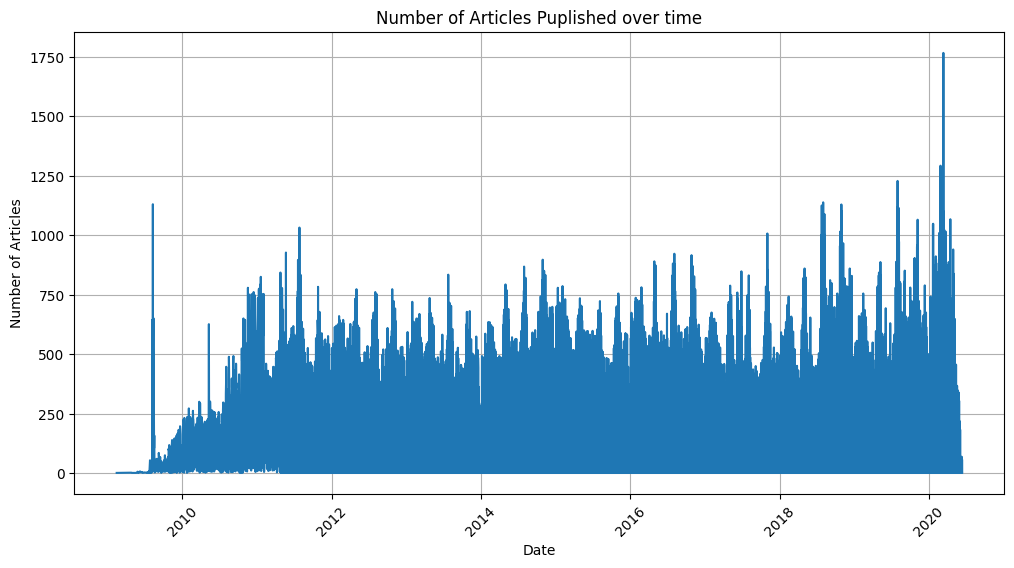

In [80]:
plt.figure(figsize=(12,6))
sns.lineplot(x=article_per_date.index, y=article_per_date.values, markers='o')
plt.title("Number of Articles Puplished over time")
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation= 45)
plt.grid()
plt.show()

In [21]:
apple_data = sentiment_data[sentiment_data['stock']=='AAPL']
apple_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,category
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL,0.5574,Positive
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL,0.0000,Neutral
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL,0.2023,Positive
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL,0.0000,Neutral
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL,0.3818,Positive
...,...,...,...,...,...,...,...,...
7116,7585,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10 00:00:00,AAPL,-0.1280,Negative
7117,7586,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10 00:00:00,AAPL,0.0000,Neutral
7118,7587,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09 00:00:00,AAPL,-0.9062,Negative
7119,7588,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09 00:00:00,AAPL,0.0000,Neutral


In [23]:
apple_data['category'].value_counts()

category
Neutral     195
Positive    149
Negative     97
Name: count, dtype: int64

In [90]:
apple = pd.read_csv('../../datasets/AAPL_historical_data.csv')
amazon = pd.read_csv('../../datasets/AMZN_historical_data.csv')
google = pd.read_csv('../../datasets/GOOG_historical_data.csv')
meta = pd.read_csv('../../datasets/META_historical_data.csv')
microsoft = pd.read_csv('../../datasets/MSFT_historical_data.csv')
nvidia = pd.read_csv('../../datasets/NVDA_historical_data.csv')
tesla = pd.read_csv('../../datasets/TSLA_historical_data.csv')


In [108]:
merged_stock= pd.merge(apple,amazon,on='Date', how='outer', suffixes=(apple,amazon))
merged_stock

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().